In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/Cold min/Downloads/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [6]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Text(0.5, 1.0, 'Label')

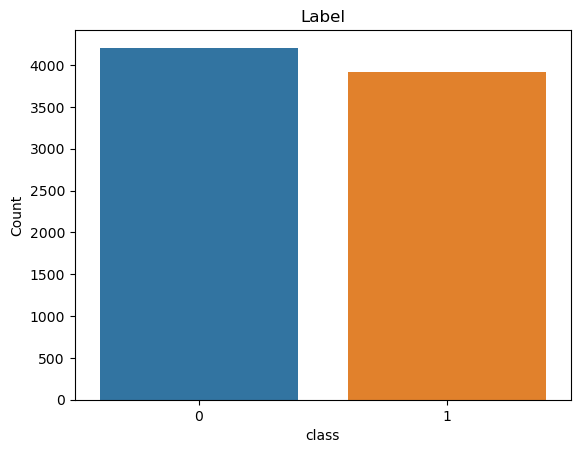

In [7]:
sns.countplot(data = data, x="class")
plt.xlabel("class")
plt.ylabel("Count")
plt.title("Label")

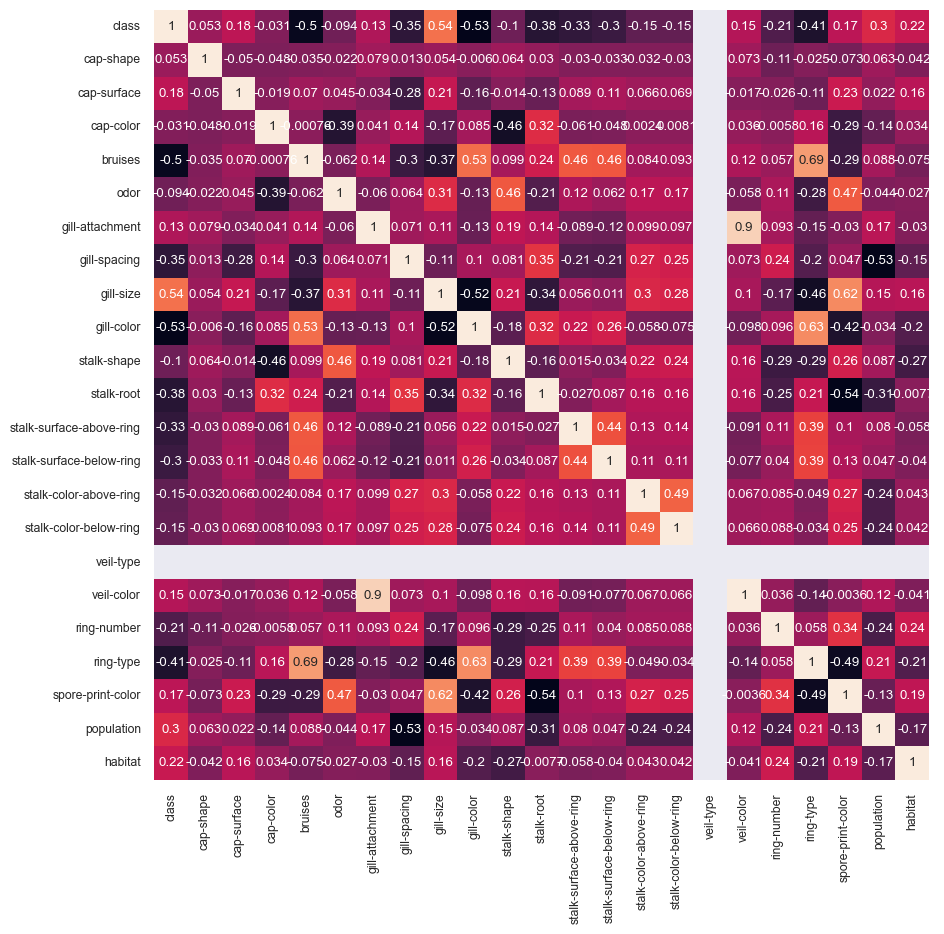

In [8]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [9]:
x = data[['bruises','cap-shape','cap-surface','population','ring-number']]
x.value_counts()

bruises  cap-shape  cap-surface  population  ring-number
0        2          3            4           1              474
         5          3            4           1              474
                    2            4           1              360
         3          2            4           1              312
         2          2            4           1              312
                                                           ... 
1        0          3            1           1                1
                    1            1           1                1
         3          3            1           1                1
                    1            1           1                1
         2          3            1           1                1
Length: 101, dtype: int64

In [10]:
y = data['class']
y.value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)

In [12]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (5,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [16]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
191/191 [==============================] - 3s 7ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.0826 - val_mse: 0.0826
Epoch 2/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0739 - mse: 0.0739 - val_loss: 0.0665 - val_mse: 0.0665
Epoch 3/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0672 - mse: 0.0672 - val_loss: 0.0663 - val_mse: 0.0663
Epoch 4/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0648 - mse: 0.0648 - val_loss: 0.0700 - val_mse: 0.0700
Epoch 5/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0643 - mse: 0.0643 - val_loss: 0.0642 - val_mse: 0.0642
Epoch 6/100
191/191 [==============================] - 1s 4ms/step - loss: 0.0634 - mse: 0.0634 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 7/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0628 - mse: 0.0628 - val_loss: 0.0624 - val_mse: 0.0624
Epoch 8/100
191/191 [==============================] - 1s 5ms/step - 

191/191 [==============================] - 1s 5ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 63/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 64/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0582 - val_mse: 0.0582
Epoch 65/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0588 - mse: 0.0588 - val_loss: 0.0573 - val_mse: 0.0573
Epoch 66/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 67/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0587 - mse: 0.0587 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 68/100
191/191 [==============================] - 1s 5ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 69/100
191/191 [==============================] - 1s 5ms/step - loss:

In [17]:
model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 3ms/step - loss: 0.0571 - mse: 0.0571


[0.05706526339054108, 0.05706526339054108]

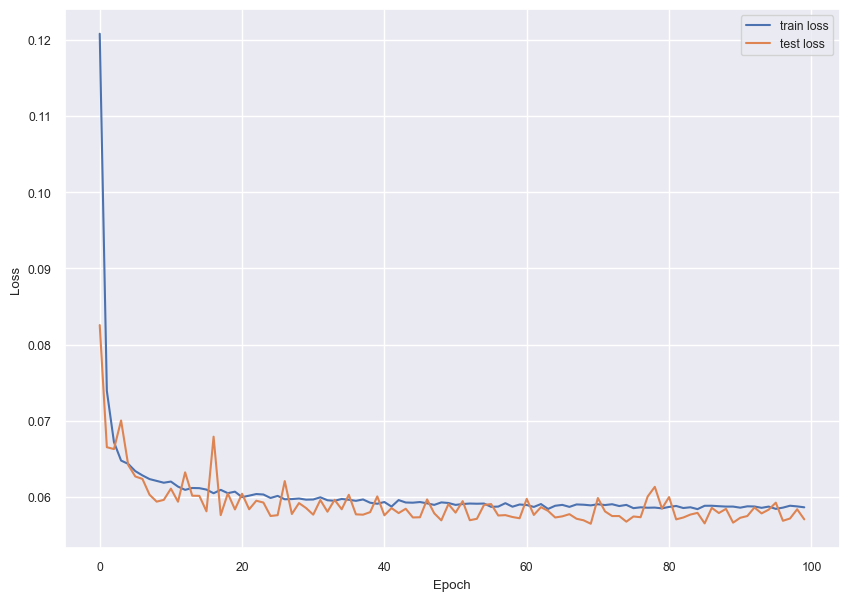

In [18]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

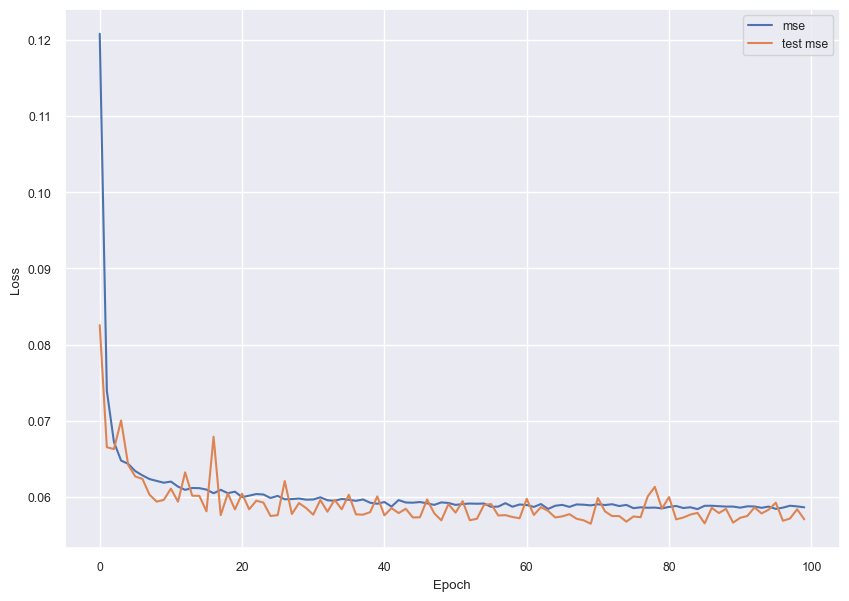

In [19]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()